 
1.  Create a function that accepts any number of countries and creates a graph showing 
the current temperature for each provided country.



In [53]:
! pip install requests matplotlib folium


Defaulting to user installation because normal site-packages is not writeable


In [54]:
import requests

api_key = "your_api_key_here"  # Replace with your actual key
url = f"http://api.openweathermap.org/data/2.5/weather?q=Stockholm&appid={api_key}"
response = requests.get(url)
print(response.json())


{'cod': 401, 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}


In [55]:
api_key = 'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}'  # Replace with your actual API key
url = f'http://api.openweathermap.org/data/2.5/weather?q=Stockholm&appid={api_key}'



In [56]:
import requests

# Correctly define your API key without spaces
api_key = 'YOUR_API_KEY'  # Replace with your actual OpenWeatherMap API key

# Define the city ID (for example, 524901 for Moscow)
city_id = '524901'  # Make sure this line is included and executed

# Construct the URL using the defined city_id and api_key
url = f'http://api.openweathermap.org/data/2.5/forecast?id={city_id}&appid={api_key}'

# Make the API request
response = requests.get(url)

# Check the response status
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    error_message = response.json().get("message", "Unknown error")
    print(f"Error: {response.status_code} - {error_message}")


Error: 401 - Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.


Could not retrieve data for Sweden: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Norway: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Denmark: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Spain: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Panama: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.


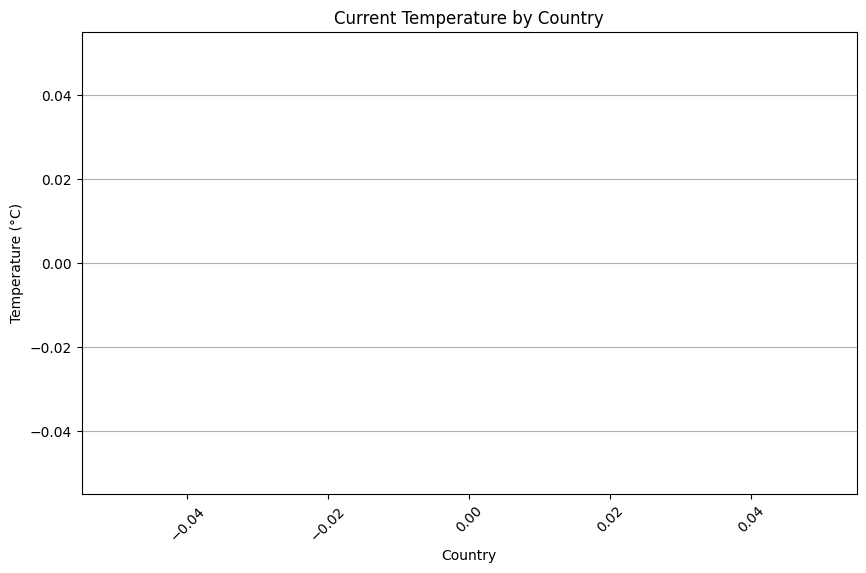

In [57]:
import requests
import matplotlib.pyplot as plt

def get_current_temperature(countries, api_key):
    temperatures = {}
    
    for country in countries:
        url = f'http://api.openweathermap.org/data/2.5/forecast?id={city_id}&appid={api_key}'
        response = requests.get(url)
        data = response.json()

        if response.status_code == 200:
            temperature = data['main']['temp']
            temperatures[country] = temperature
        else:
            print(f"Could not retrieve data for {country}: {data.get('message', '')}")

    # Plotting the temperatures
    plt.figure(figsize=(10, 6))
    plt.bar(temperatures.keys(), temperatures.values(), color='skyblue')
    plt.title('Current Temperature by Country')
    plt.xlabel('Country')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Example usage
api_key = 'YOUR_API_KEY'  # Replace with your actual API key
get_current_temperature(['Sweden', 'Norway', 'Denmark', 'Spain', 'Panama'], api_key)


2.  Show in a map the current temperature for the following countries Sweden, Norwary, 
Denmark, Spain, and Panama. The size of the marker is associated to the pressure.

In [58]:
import folium

def show_temperature_map(countries, api_key):
    # Create a map centered on Europe
    temperature_map = folium.Map(location=[60, 10], zoom_start=3)

    for country in countries:
        url = f'http://api.openweathermap.org/data/2.5/weather?q={country}&appid={api_key}&units=metric'
        response = requests.get(url)
        data = response.json()

        if response.status_code == 200:
            name = data['name']
            temperature = data['main']['temp']
            pressure = data['main']['pressure']
            lat = data['coord']['lat']
            lon = data['coord']['lon']

            # Create a marker with size based on pressure
            folium.CircleMarker(
                location=(lat, lon),
                radius=pressure / 10,  # Adjust the size factor as needed
                color='blue',
                fill=True,
                fill_opacity=0.6,
                popup=f"{name}: {temperature}°C, Pressure: {pressure} hPa"
            ).add_to(temperature_map)

    # Save the map to an HTML file
    temperature_map.save('temperature_map.html')

# Example usage
api_key = 'YOUR_API_KEY'  # Replace with your actual API key
show_temperature_map(['Sweden', 'Norway', 'Denmark', 'Spain', 'Panama'], api_key)


Could not retrieve data for Sweden: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Norway: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Denmark: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Spain: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Panama: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.


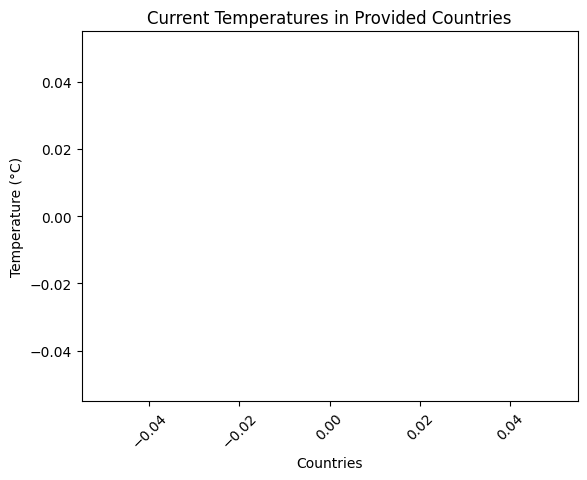

In [59]:
import requests
import matplotlib.pyplot as plt
import folium

# Function to fetch current temperature and pressure for given countries
def fetch_weather_data(countries, api_key):
    weather_data = {}
    for country in countries:
        try:
            # Fetching weather data for each country
            response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={country}&appid={api_key}&units=metric')
            if response.status_code == 200:
                data = response.json()
                weather_data[country] = {
                    'temperature': data['main']['temp'],
                    'pressure': data['main']['pressure'],
                    'latitude': data['coord']['lat'],
                    'longitude': data['coord']['lon'],
                }
            else:
                print(f"Could not retrieve data for {country}: {response.json().get('message', 'Unknown error')}")
        except Exception as e:
            print(f"Error fetching data for {country}: {str(e)}")
    return weather_data

# Function to create a temperature graph
def create_temperature_graph(weather_data):
    countries = list(weather_data.keys())
    temperatures = [data['temperature'] for data in weather_data.values()]
    
    plt.bar(countries, temperatures, color='skyblue')
    plt.xlabel('Countries')
    plt.ylabel('Temperature (°C)')
    plt.title('Current Temperatures in Provided Countries')
    plt.xticks(rotation=45)
    plt.show()

# Function to create a temperature map
def create_temperature_map(weather_data):
    # Initialize the map
    m = folium.Map(location=[0, 0], zoom_start=2)
    
    for country, data in weather_data.items():
        # Create a circle marker with size based on pressure
        folium.CircleMarker(
            location=(data['latitude'], data['longitude']),
            radius=data['pressure'] / 10,  # Scale down pressure for better visualization
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{country}: {data['temperature']}°C, Pressure: {data['pressure']} hPa"
        ).add_to(m)

    return m

# Define your OpenWeatherMap API key
API_KEY = 'YOUR_API_KEY'  # Replace with your actual API key

# List of countries to analyze
countries = ['Sweden', 'Norway', 'Denmark', 'Spain', 'Panama']

# Fetch weather data
weather_data = fetch_weather_data(countries, API_KEY)

# Create temperature graph
create_temperature_graph(weather_data)

# Create and display temperature map
temperature_map = create_temperature_map(weather_data)
temperature_map.save('temperature_map.html')  # Save the map to an HTML file


In [60]:
! pip install requests folium


Defaulting to user installation because normal site-packages is not writeable


In [61]:
import requests
import folium

# Function to fetch current weather data for the specified countries
def fetch_weather_data(countries, api_key):
    weather_data = {}
    for country in countries:
        try:
            # Fetch weather data for each country
            response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={country}&appid={api_key}&units=metric')
            if response.status_code == 200:
                data = response.json()
                weather_data[country] = {
                    'temperature': data['main']['temp'],
                    'pressure': data['main']['pressure'],
                    'latitude': data['coord']['lat'],
                    'longitude': data['coord']['lon'],
                }
            else:
                print(f"Could not retrieve data for {country}: {response.json().get('message', 'Unknown error')}")
        except Exception as e:
            print(f"Error fetching data for {country}: {str(e)}")
    return weather_data

# Function to create a temperature map
def create_temperature_map(weather_data):
    # Initialize the map
    m = folium.Map(location=[0, 0], zoom_start=2)
    
    for country, data in weather_data.items():
        # Create a circle marker with size based on pressure
        folium.CircleMarker(
            location=(data['latitude'], data['longitude']),
            radius=data['pressure'] / 10,  # Scale down pressure for better visualization
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{country}: {data['temperature']}°C, Pressure: {data['pressure']} hPa"
        ).add_to(m)

    return m

# Define your OpenWeatherMap API key
API_KEY = 'YOUR_API_KEY'  # Replace with your actual API key

# List of countries to analyze
countries = ['Sweden', 'Norway', 'Denmark', 'Spain', 'Panama']

# Fetch weather data
weather_data = fetch_weather_data(countries, API_KEY)

# Create and display temperature map
temperature_map = create_temperature_map(weather_data)
temperature_map.save('temperature_map.html')  # Save the map to an HTML file

# To display the map in Jupyter Notebook (if using Jupyter):
# temperature_map


Could not retrieve data for Sweden: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Norway: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Denmark: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Spain: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Could not retrieve data for Panama: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
